In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
df = pd.read_csv('/content/drive/MyDrive/mcdonalds.csv')

In [3]:
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [4]:
n = len(df) // 2  # Assuming the data is equally split
wi91act = df.iloc[:n].copy()
wi97act = df.iloc[n:].copy()


In [5]:
yes_no_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
                  'tasty', 'expensive', 'healthy', 'disgusting']

In [6]:
for col in yes_no_columns:
    wi91act[col] = wi91act[col].map({'Yes': 1, 'No': 0})
    wi97act[col] = wi97act[col].map({'Yes': 1, 'No': 0})

In [7]:
p91 = wi91act[yes_no_columns].mean()
p97 = wi97act[yes_no_columns].mean()


In [8]:
print("Percentage of activities in 1991:")
print(round(100 * p91))

print("Percentage of activities in 1997:")
print(round(100 * p97))

Percentage of activities in 1991:
yummy         57.0
convenient    91.0
spicy         10.0
fattening     86.0
greasy        51.0
fast          90.0
cheap         61.0
tasty         66.0
expensive     36.0
healthy       21.0
disgusting    23.0
dtype: float64
Percentage of activities in 1997:
yummy         54.0
convenient    91.0
spicy          9.0
fattening     87.0
greasy        54.0
fast          90.0
cheap         59.0
tasty         63.0
expensive     36.0
healthy       18.0
disgusting    25.0
dtype: float64


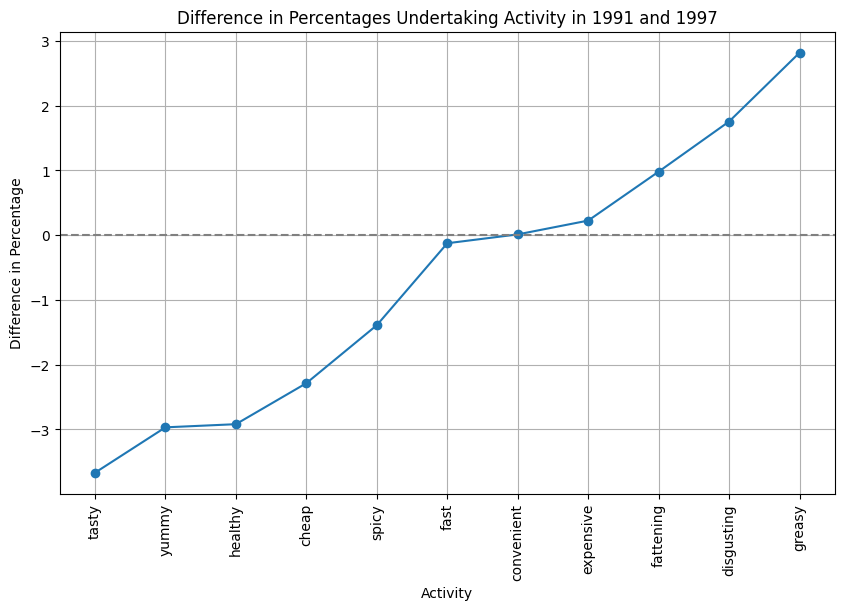

In [9]:
diff = 100 * (p97 - p91)
sorted_diff = diff.sort_values()

plt.figure(figsize=(10, 6))
plt.plot(sorted_diff, marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Activity')
plt.ylabel('Difference in Percentage')
plt.title('Difference in Percentages Undertaking Activity in 1991 and 1997')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [10]:
np.random.seed(1234)
kmeans_91 = KMeans(n_clusters=6, n_init=20, random_state=1234)
clusters_91 = kmeans_91.fit_predict(wi91act[yes_no_columns])
size91 = pd.Series(clusters_91).value_counts()
clusters_97 = kmeans_91.predict(wi97act[yes_no_columns])
size97 = pd.Series(clusters_97).value_counts()

In [11]:
print("Cluster sizes for 1991:")
print(size91)

print("Cluster sizes for 1997:")
print(size97)

Cluster sizes for 1991:
0    206
5    123
4    109
2    104
3     94
1     90
Name: count, dtype: int64
Cluster sizes for 1997:
0    202
5    143
1    101
2    100
4     97
3     84
Name: count, dtype: int64


In [12]:
contingency_table = pd.DataFrame({'1991': size91, '1997': size97}).fillna(0)

In [13]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared: {chi2}, p-value: {p}")

Chi-Squared: 3.5150546234484694, p-value: 0.6211109060671963


In [14]:
mosaic_data = {
    ('1991', 'Cluster 1'): size91.get(0, 0),
    ('1991', 'Cluster 2'): size91.get(1, 0),
    ('1991', 'Cluster 3'): size91.get(2, 0),
    ('1991', 'Cluster 4'): size91.get(3, 0),
    ('1991', 'Cluster 5'): size91.get(4, 0),
    ('1991', 'Cluster 6'): size91.get(5, 0),
    ('1997', 'Cluster 1'): size97.get(0, 0),
    ('1997', 'Cluster 2'): size97.get(1, 0),
    ('1997', 'Cluster 3'): size97.get(2, 0),
    ('1997', 'Cluster 4'): size97.get(3, 0),
    ('1997', 'Cluster 5'): size97.get(4, 0),
    ('1997', 'Cluster 6'): size97.get(5, 0),
}

<Figure size 1000x600 with 0 Axes>

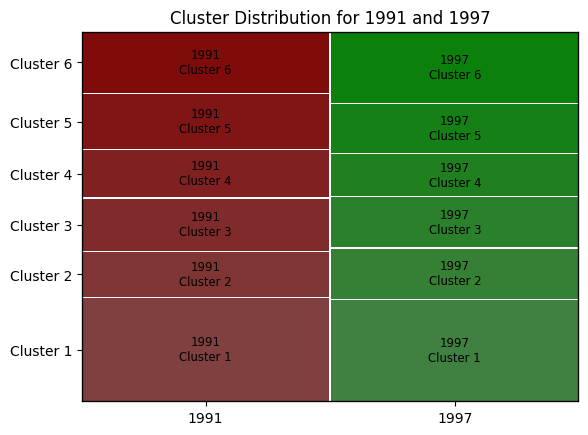

In [15]:
plt.figure(figsize=(10, 6))
mosaic(mosaic_data, title='Cluster Distribution for 1991 and 1997')
plt.show()